# Question 1:

Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

users['is_male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)

male_ratio = users.groupby('occupation')['is_male'].mean()

male_ratio_sorted = male_ratio.sort_values(ascending=False)
print(male_ratio_sorted)

min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_per_occupation)

mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_occupation_gender)

gender_count = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

gender_percentage = gender_count.div(gender_count.sum(axis=1), axis=0) * 100
print(gender_percentage)



occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
program

# Question 2:
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russiaper Team

In [13]:
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

goal_column = euro12['Goals']
print(goal_column)

num_teams = euro12['Team'].nunique()
print(f"Number of teams: {num_teams}")

num_columns = euro12.shape[1]
print(f"Number of columns: {num_columns}")

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sorted_discipline)

mean_yellow_cards = euro12['Yellow Cards'].mean()
print(f"Mean Yellow Cards per team: {mean_yellow_cards}")

teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(teams_more_than_6_goals)


teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]
print(teams_start_with_g)

first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

all_except_last_3 = euro12.iloc[:, :-3]
print(all_except_last_3)

shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shooting_accuracy)





0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
Number of teams: 16
Number of columns: 35
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15  

# Question 3:

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [15]:

import pandas as pd
import numpy as np


series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))
df = pd.concat([series1, series2, series3], axis=1)
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("DataFrame with renamed columns:")
print(df.head())

bigcolumn = pd.concat([series1, series2, series3], axis=0).to_frame(name='bigcolumn')
print("\nOne-column DataFrame:")
print(bigcolumn)

print("\nIndex values of bigcolumn:")
print(bigcolumn.index)

bigcolumn = bigcolumn.reset_index(drop=True)
print("\nReindexed DataFrame:")
print(bigcolumn)


DataFrame with renamed columns:
   bedrs  bathrs  price_sqr_meter
0      4       3            16035
1      1       3            15752
2      2       2            12335
3      1       2            13736
4      1       3            19987

One-column DataFrame:
    bigcolumn
0           4
1           1
2           2
3           1
4           1
..        ...
95      24319
96      26572
97      29889
98      15289
99      22276

[300 rows x 1 columns]

Index values of bigcolumn:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64', length=300)

Reindexed DataFrame:
     bigcolumn
0            4
1            1
2            2
3            1
4            1
..         ...
295      24319
296      26572
297      29889
298      15289
299      22276

[300 rows x 1 columns]


# Question 4: 

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all loca(assume that the first week starts on January 2 1961) for the first 52 weeks.tions for each week75 12.71

In [63]:
import pandas as pd
import numpy as np

wind_data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0, 1, 2]])
#wind_data='wind.txt'
#wind_data()
wind_data.columns = ['Date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

wind_data['Date'] = pd.to_datetime(wind_data['Date'], errors='coerce')

def fix_year(year):
    if year > 2000:
        return year - 100
    return year
wind_data['Date'] = wind_data['Date'].apply(lambda x: x.replace(year=fix_year(x.year)))

wind_data.set_index('Date', inplace=True)
print("\nData index type:", wind_data.index.dtype)

missing_per_location = wind_data.isnull().sum()
print("\nMissing values per location:\n", missing_per_location)

non_missing_total = wind_data.notnull().sum().sum()
print("\nTotal number of non-missing values:", non_missing_total)

mean_windspeed = wind_data.mean().mean()
print("\nMean windspeed across all locations and times:", mean_windspeed)

loc_stats = wind_data.agg(['min', 'max', 'mean', 'std'])
print("\nLocation statistics:\n", loc_stats)

day_stats = wind_data.agg(['min', 'max', 'mean', 'std'], axis=1)
print("\nDaily statistics (first 5 days):\n", day_stats.head())

january_data = wind_data[wind_data.index.month == 1]
january_avg_windspeed = january_data.mean()
print("\nAverage windspeed in January for each location:\n", january_avg_windspeed)

yearly_data = wind_data.resample('YE').mean()
print("\nYearly downsampled data (first 5 years):\n", yearly_data.head())

monthly_data = wind_data.resample('ME').mean()
print("\nMonthly downsampled data (first 5 months):\n", monthly_data.head())

weekly_data = wind_data.resample('W').mean()
print("\nWeekly downsampled data (first 5 weeks):\n", weekly_data.head())

weekly_stats = weekly_data.agg(['min', 'max', 'mean', 'std'], axis=1).iloc[:52]
print("\nWeekly statistics for the first 52 weeks:\n", weekly_stats)


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_15904\3923412779.py:4: SyntaxWarning: invalid escape sequence '\s'
  wind_data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0, 1, 2]])
C:\Users\user\AppData\Local\Temp\ipykernel_15904\3923412779.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  wind_data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0, 1, 2]])
C:\Users\user\AppData\Local\Temp\ipykernel_15904\3923412779.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind_data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0, 1, 2]])



Data index type: datetime64[ns]

Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total number of non-missing values: 78857

Mean windspeed across all locations and times: 10.227982360836938

Location statistics:
             RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4

# Question 5:

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [67]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

chipo.head(10)

print(chipo.head(10))

num_observations = chipo.shape[0]
print("\nNumber of observations:", num_observations)

num_columns = chipo.shape[1]
print("\nNumber of columns:", num_columns)

columns = chipo.columns.tolist()
print("\nColumn names:", columns)

print("\nIndex of the dataset:", chipo.index)

most_ordered_item = chipo.item_name.value_counts().idxmax()
print("\nMost-ordered item:", most_ordered_item)

most_ordered_count = chipo[chipo['item_name'] == most_ordered_item].shape[0]
print("\nNumber of items ordered for the most-ordered item:", most_ordered_count)

most_ordered_choice = chipo.choice_description.value_counts().idxmax()
print("\nMost ordered item in the choice_description column:", most_ordered_choice)

total_items_ordered = chipo.shape[0]
print("\nTotal items ordered:", total_items_ordered)

chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

print("\nType of item price:", type(chipo['item_price'].iloc[0]))

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

print("\nType of item price after applying lambda function:", type(chipo['item_price'].iloc[0]))

revenue = (chipo['item_price'] * chipo['quantity']).sum()
print("\nTotal revenue:", revenue)

num_orders = chipo['order_id'].nunique()
print("\nNumber of orders:", num_orders)

average_revenue_per_order = revenue / num_orders
print("\nAverage revenue per order:", average_revenue_per_order)

num_different_items = chipo['item_name'].nunique()
print("\nNumber of different items sold:", num_different_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question 6:

Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


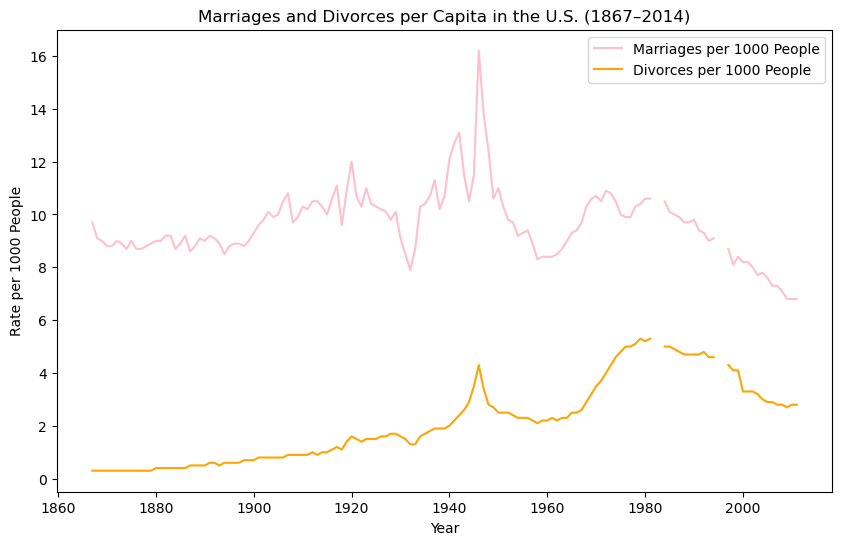

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'US-marriages-divorces-1867-2014.csv'

data = pd.read_csv(file_path)

print(data.head())

plt.figure(figsize=(10, 6))
ax = plt.gca()  

ax.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000 People', color='pink')
ax.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000 People', color='orange')
ax.set_title('Marriages and Divorces per Capita in the U.S. (1867–2014)')
ax.set_xlabel('Year')
ax.set_ylabel('Rate per 1000 People')
ax.legend()

plt.show()


# Question 7:

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

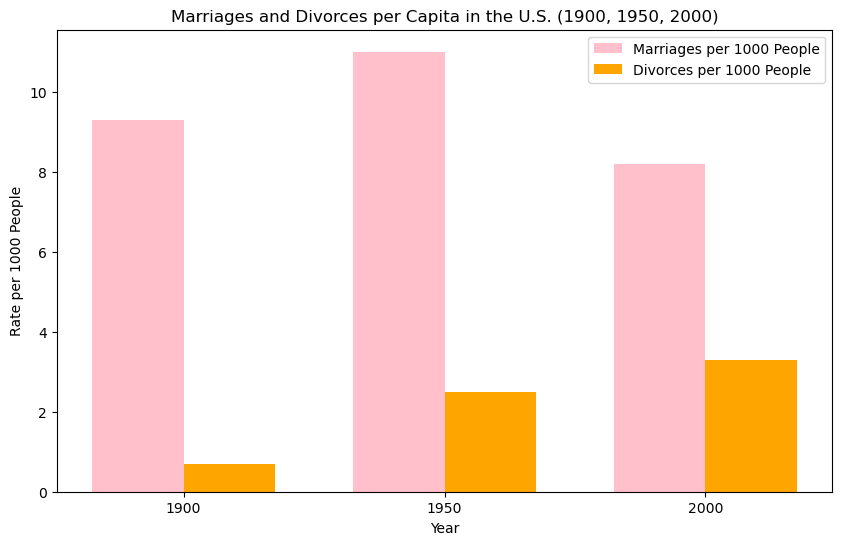

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "US-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

filtered_data = data[(data['Year'] == 1900) | (data['Year'] == 1950) | (data['Year'] == 2000)]

years = filtered_data['Year']
marriages = filtered_data['Marriages_per_1000']
divorces = filtered_data['Divorces_per_1000']

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  
index = range(len(years))

ax.bar(index, marriages, bar_width, label='Marriages per 1000 People', color='pink')
ax.bar([p + bar_width for p in index], divorces, bar_width, label='Divorces per 1000 People', color='orange')

# Labeling
ax.set_title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
ax.set_xlabel('Year')
ax.set_ylabel('Rate per 1000 People')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(years)
ax.legend()

plt.show()


# Question 8:

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

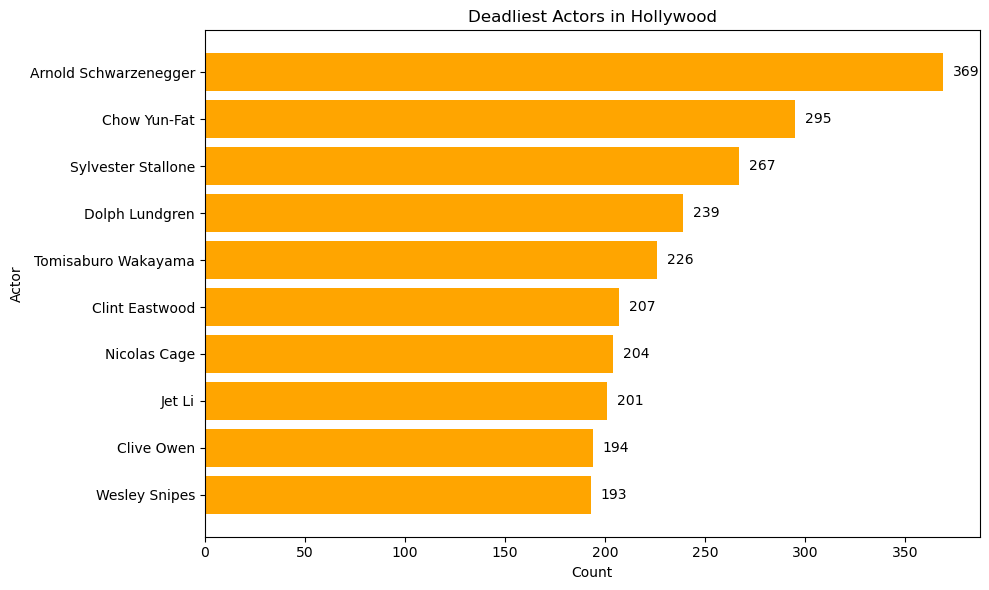

In [105]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "actor_kill_counts.csv"
actors_df = pd.read_csv(file_path)

actors_df.sort_values('Count', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6)) 

ax.barh(actors_df['Actor'], actors_df['Count'], color='orange')

ax.set_title('Deadliest Actors in Hollywood')
ax.set_xlabel('Count')
ax.set_ylabel('Actor')


for i, v in enumerate(actors_df['Count']):
    ax.text(v + 5, i, str(v), va='center')  

plt.tight_layout()  
plt.show()


# Question 9:

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

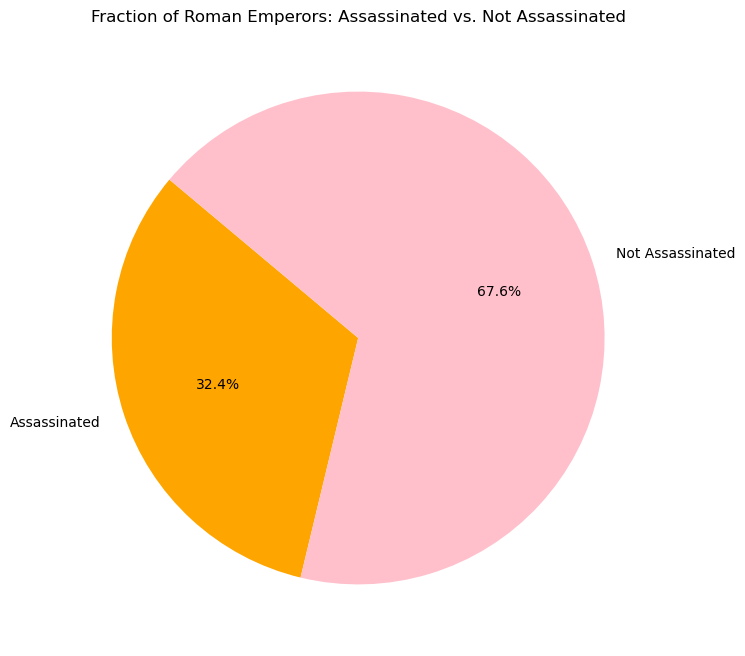

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'roman-emperor-reigns.csv'
data = pd.read_csv(file_path)

assassinated = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
not_assassinated = data[data['Cause_of_Death'] != 'Assassinated'].shape[0]

labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated, not_assassinated]
colors = ['orange', 'pink']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fraction of Roman Emperors: Assassinated vs. Not Assassinated')
plt.show()


# Question 10:

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

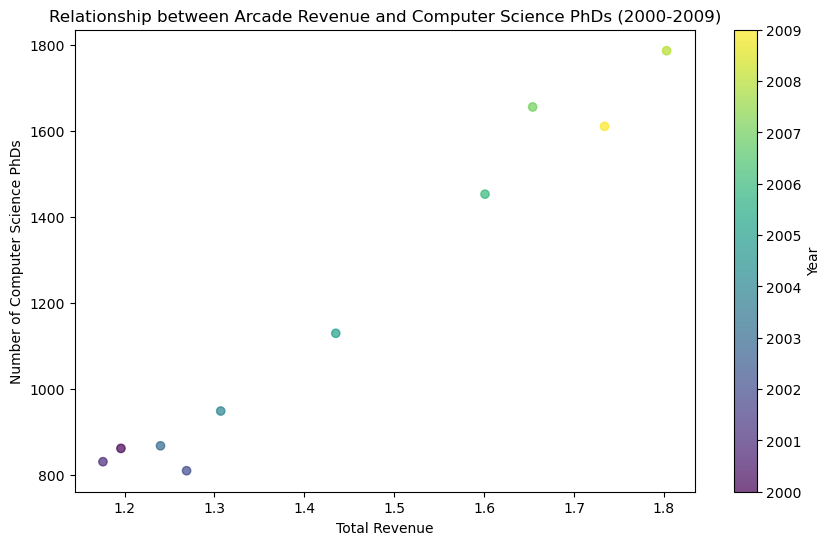

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(file_path)

data['Year'] = pd.to_datetime(data['Year'], format='%Y')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'].dt.year, cmap='viridis', alpha=0.7)

plt.colorbar(scatter, label='Year')

plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.xlabel('Total Revenue')
plt.ylabel('Number of Computer Science PhDs')

plt.show()
